In [8]:
import cv2
import numpy
import os
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from keras.models import load_model
from sklearn.model_selection import train_test_split

In [2]:
{1: "Drowsy", 0: "Alert"}

{1: 'Drowsy', 0: 'Alert'}

In [9]:
drowsy = os.listdir("../Dataset/Only Eyes Dataset/Drowsy")
alert = os.listdir("../Dataset/Only Eyes Dataset/Updated Alert")

In [10]:
df_train = pd.DataFrame(columns=["Input", "Output"])

In [11]:
for i in drowsy:
    frame = cv2.imread("../Dataset/Only Eyes Dataset/Drowsy/" + i)
    frame = cv2.resize(frame, (85, 40))
   # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    dict_ = {"Input": [frame], "Output": [1]}
    df_train = pd.concat([df_train, pd.DataFrame(data=dict_)], axis=0).reset_index(drop=True)

In [12]:
for i in alert:
    frame = cv2.imread("../Dataset/Only Eyes Dataset/Alert/" + i)
    frame = cv2.resize(frame, (85, 40))
   # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    dict_ = {"Input": [frame], "Output": [0]}
    df_train = pd.concat([df_train, pd.DataFrame(data=dict_)], axis=0).reset_index(drop=True)

In [13]:
df_train["Output"].value_counts()

1    1224
0    1215
Name: Output, dtype: int64

In [2]:
model = Sequential([
    Conv2D(20, kernel_size=3, activation='relu', input_shape=(40, 85, 1)),
    Conv2D(10, kernel_size=3, activation='relu'),
    Conv2D(5, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 83, 20)        560       
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 81, 10)        1810      
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 79, 5)         455       
                                                                 
 flatten (Flatten)           (None, 13430)             0         
                                                                 
 dense (Dense)               (None, 10)                134310    
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 2)                 1

In [5]:
!pip install visualkeras

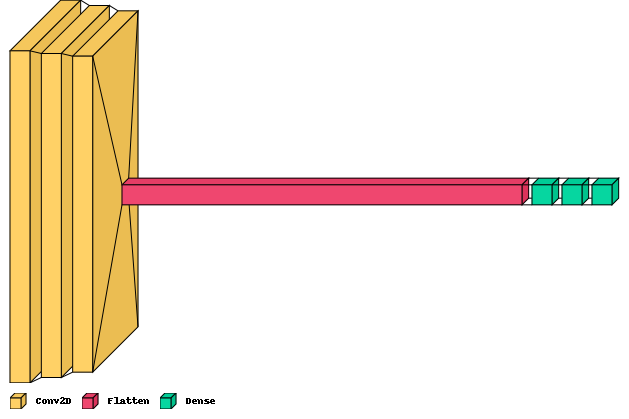

In [7]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
X_train, X_cv, y_train, y_cv = train_test_split(df_train["Input"], df_train["Output"], train_size=0.7)

In [16]:
X_cv.shape

(732,)

In [15]:
X_train.shape

(1707,)

In [12]:
X_train_ = []
X_cv_ = []

for i in X_train:
    X_train_.append(tf.convert_to_tensor(i))
for i in X_cv:
    X_cv_.append(tf.convert_to_tensor(i))

In [13]:
X_train = tf.convert_to_tensor(X_train_, dtype="float32")
X_cv = tf.convert_to_tensor(X_cv_, dtype="float32")

In [14]:
y_train = y_train.astype("float32")
y_cv = y_cv.astype("float32")

In [15]:
model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=100, batch_size=20)

Epoch 1/100
86/86 [==============================] - 12s 120ms/step - loss: 0.5201 - accuracy: 0.7698 - val_loss: 0.4505 - val_accuracy: 0.6817
Epoch 2/100
86/86 [==============================] - 10s 112ms/step - loss: 0.3772 - accuracy: 0.8178 - val_loss: 0.4202 - val_accuracy: 0.7117
Epoch 3/100
86/86 [==============================] - 10s 115ms/step - loss: 0.3681 - accuracy: 0.8079 - val_loss: 0.2936 - val_accuracy: 0.8661
Epoch 4/100
86/86 [==============================] - 10s 116ms/step - loss: 0.4360 - accuracy: 0.8014 - val_loss: 0.4249 - val_accuracy: 0.8306
Epoch 5/100
86/86 [==============================] - 10s 114ms/step - loss: 0.2765 - accuracy: 0.8676 - val_loss: 0.2613 - val_accuracy: 0.9167
Epoch 6/100
86/86 [==============================] - 10s 117ms/step - loss: 0.2552 - accuracy: 0.8875 - val_loss: 0.5433 - val_accuracy: 0.6475
Epoch 7/100
86/86 [==============================] - 10s 115ms/step - loss: 0.3241 - accuracy: 0.8395 - val_loss: 0.3196 - val_accuracy:

KeyboardInterrupt: 

In [16]:
model.save("Eye Drowsiness Only Eyes RGB Extra Dataset")

INFO:tensorflow:Assets written to: Eye Drowsiness Only Eyes RGB Extra Dataset\assets
